In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X  = df.drop('sales',axis=1)

In [5]:
y= df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_features = polynomial_converter.transform(X)
#instead we can directly do poly_features = polynomial_converter.fit_transform(X)

In [10]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [11]:
poly_features.shape

(200, 9)

In [12]:
X.shape

(200, 3)

In [13]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [14]:
poly_features[0]  #(x,y,z,xy,xz,yz,x^2,y^2,z^2)

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [21]:
test_prediction = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [23]:
mean_absolute_error(y_test,test_prediction)

0.4896798044803598

In [24]:
mean_squared_error(y_test,test_prediction)

0.4417505510403428

In [25]:
#RMSE
mean_squared_error(y_test,test_prediction)**0.5

0.6646431757269029

In [26]:
#its performing better than linear regression in this case

##### How to decide the degree of polynomial

In [27]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):

    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [28]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292231,
 0.43393443569020673,
 0.35170836883993534,
 0.25093429292372726,
 0.2019808982682836,
 5.42593081475211,
 0.1413370816951791,
 0.17124578729920312]

In [29]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269029,
 0.5803286825229247,
 0.5077742602627969,
 2.575830033076485,
 4.399670499535667,
 1373.8203837602075,
 4230.904381567061,
 94887.01088688083]

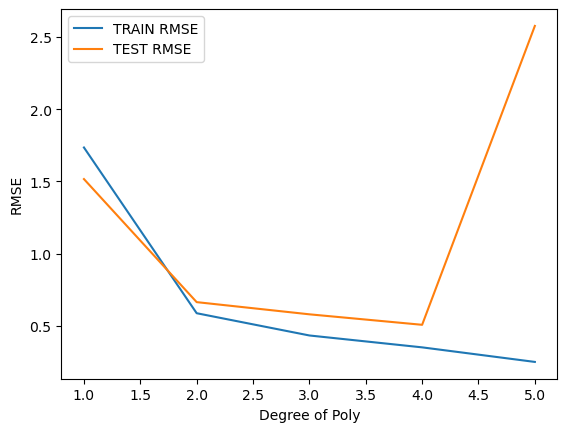

In [34]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

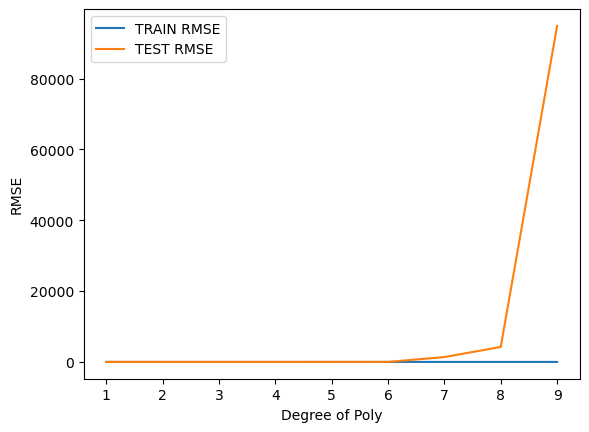

In [35]:
#for our current data it is not feasible to go for 10 degree so it is just for visualizing purpose
plt.plot(range(1,10),train_rmse_errors,label='TRAIN RMSE')
plt.plot(range(1,10),test_rmse_errors,label='TEST RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

##### Saving the model and poly converter

In [36]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False) 
#degree is decided by looking at graph(safe region)

In [37]:
final_model = LinearRegression()

In [38]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [39]:
from joblib import dump,load

In [40]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [41]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

##### How to load

In [42]:
loaded_converter = load('final_converter.joblib')

In [43]:
loaded_model = load('final_poly_model.joblib')

In [46]:
transformed_data = loaded_converter.fit_transform([[149,22,12]])

In [47]:
transformed_data

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [48]:
loaded_model.predict(transformed_data)

array([14.64501014])